In [8]:
# Question 1: 

# Using Bayes Theorem, we have that P(A|B) = [P(B|A)P(A)]/P(B). A is the event that the student passes the class and B is the 
# event that the student answers the question quickly. Therefore, we are given that P(A) = 0.9, P(B|A) = 0.6, and P(B|A^C) = 0.3. 
# (From this, we can also obtain that P(A^C) = 1 - 0.9 = 0.1.
# If we make a decision tree with these probabilities (or use the Law of Total Probability), we will find that P(B) = (0.9 * 0.6)
# + (0.3 * 0.1) = 0.57. Finally, we have all the components of Bayes Theorem which we can plug in P(A|B) = [P(B|A)P(A)]/P(B) = 
(0.6 * 0.9)/(0.57)


0.9473684210526317

In [26]:
# Question 2: 

# The pdf of a multinomial distribution is f(x1,...,xk, p1,...,pk) = c*Π(pi^xi), where c is the normalizing constant. 
# Therefore the likelihood function in this question is P(X|θ, n) ∝ Π(θi^xi). The prior based on the Dirichlet distribution 
# is P(θ|α) ∝ Π(θi)^(αi-1). Using Bayes Theorem to find the posterier, we multiply the likelihood and prior, which then allows us to 
# add the exponents together. We find that P(θ|x,α,n) is proportional to a Dirichlet distribution with new parameter α' = α + x. 


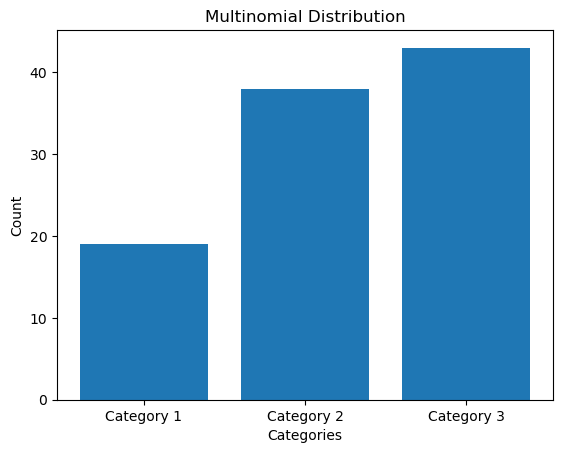

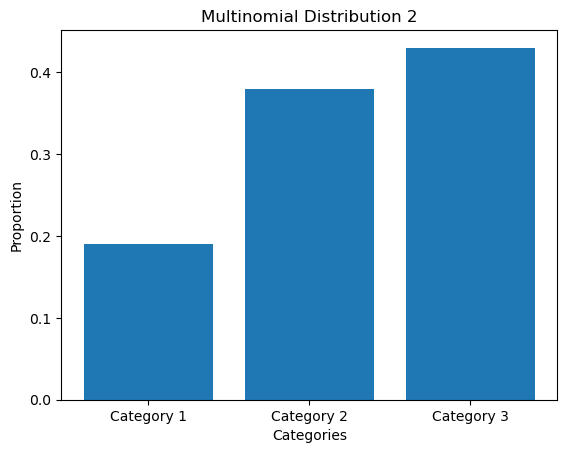

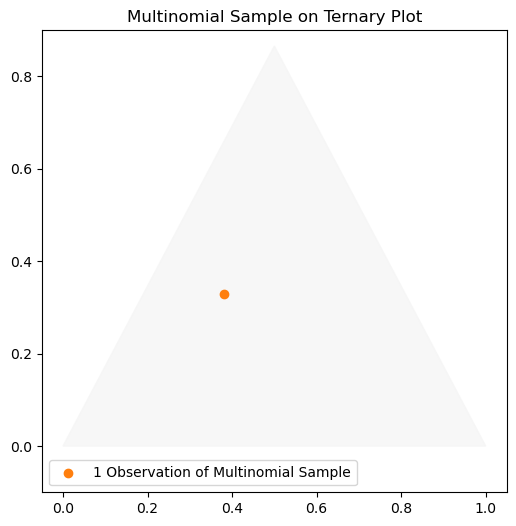

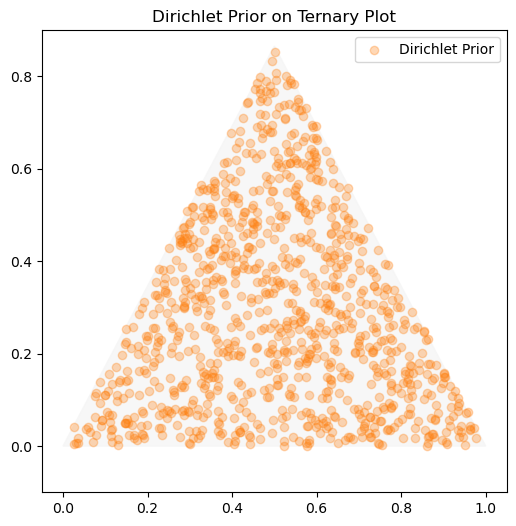

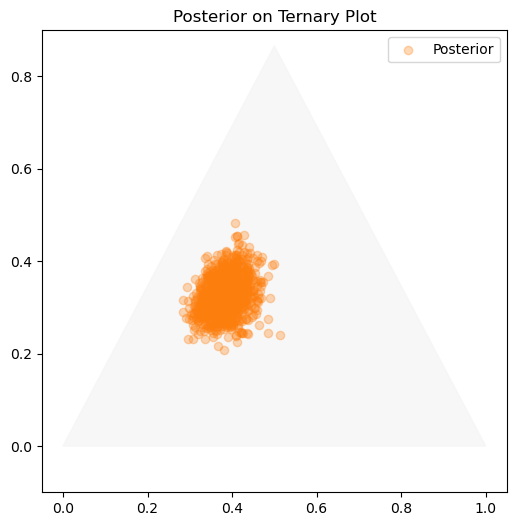

In [28]:
# Question 3: 

import numpy as np
import matplotlib.pyplot as plt
# !pip install python-ternary
import ternary
from scipy.stats import dirichlet

# 3 Category multinomial sample
n = 100
probabilities = [0.25, 0.35, 0.4]
multinom_sample = np.random.multinomial(n, probabilities)

# Multinomial distribution
categories = ['Category 1', 'Category 2', 'Category 3']
plt.bar(categories, multinom_sample)
plt.title('Multinomial Distribution')
plt.xlabel('Categories')
plt.ylabel('Count')
plt.show()

# Multinomial distribution, but with the proportions on the y-axis instead of counts
categories = ['Category 1', 'Category 2', 'Category 3']
proportions = [i / 100 for i in multinom_sample]
plt.bar(categories, proportions)
plt.title('Multinomial Distribution 2')
plt.xlabel('Categories')
plt.ylabel('Proportion')
plt.show()

# Multinomial sample 
fig, tax = plt.subplots(1, 1, figsize=(6, 6), dpi=100)
tax = ternary.TernaryAxesSubplot(ax=tax)
tax.set_title('Multinomial Sample on Ternary Plot')

tax.scatter([proportions], label='1 Observation of Multinomial Sample')
tax.legend()
tax.show()

# Dirichlet prior ternary plot
alpha_prior = np.array([1, 1, 1])  
dirichlet_prior = dirichlet(alpha_prior)

prior_sample = dirichlet_prior.rvs(1000)

fig, tax = plt.subplots(1, 1, figsize=(6, 6), dpi=100)
tax = ternary.TernaryAxesSubplot(ax=tax)
tax.set_title('Dirichlet Prior on Ternary Plot')

tax.scatter(prior_sample, alpha=0.3, label='Dirichlet Prior')
tax.legend()
tax.show()

# Posterior ternary plot (following a Dirichlet distribution from part 2)
# Using new solved parameter:
alpha_posterior = alpha_prior + multinom_sample
dirichlet_posterior = dirichlet(alpha_posterior)
posterior_sample = dirichlet_posterior.rvs(1000)

fig, tax = plt.subplots(1, 1, figsize=(6, 6), dpi=100)
tax = ternary.TernaryAxesSubplot(ax=tax)
tax.set_title('Posterior on Ternary Plot')

tax.scatter(posterior_sample, alpha=0.3, label='Posterior')
tax.legend()
tax.show()
